In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# 1. data observation & processing

In [2]:
data =pd.read_csv("creditcard.csv")

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

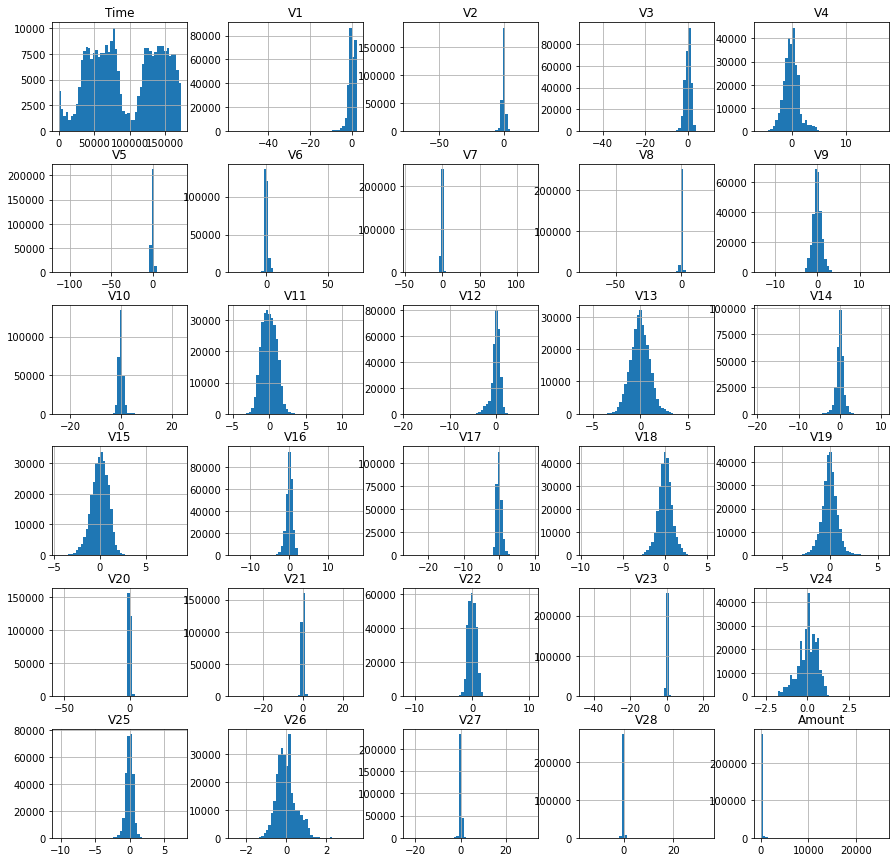

In [5]:
data.drop(['Class'],axis=1).hist(bins=50,figsize=(15,15))
plt.show()

In [6]:
classAmount=data["Class"].value_counts()
print(classAmount)

0    284315
1       492
Name: Class, dtype: int64


In [7]:
f_count=len(data[data["Class"]==1])
n_count=len(data[data["Class"]==0])
print("percentage of fraud transaction is %.03f"%(f_count/(f_count+n_count)*100)+"%")
print("percentage of normal transaction is %.03f"%(n_count/(f_count+n_count)*100)+"%")

percentage of fraud transaction is 0.173%
percentage of normal transaction is 99.827%


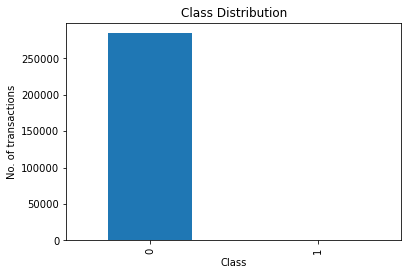

In [8]:
classAmount.plot.bar()
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("No. of transactions")
plt.show()

#### out of 284807 transactions, only 492 are fraudulent, thus, the datasets is highly imbalanced

## 1.1 check if "amount" is associated with class

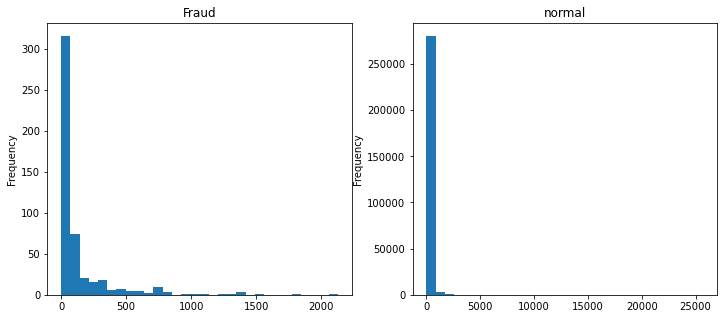

In [9]:
FraudTransaction=data[data["Class"]==1]
NormalTransaction=data[data["Class"]==0]
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
FraudTransaction["Amount"].plot.hist(title="Fraud",ax=ax1,bins=30)
NormalTransaction["Amount"].plot.hist(title="normal",ax=ax2,bins=30)
plt.show()

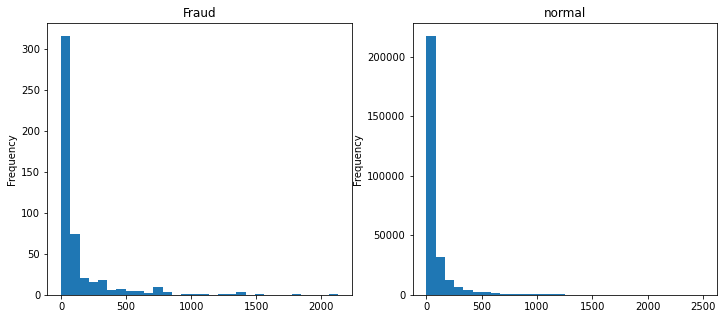

In [10]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5)) # 选则这一列，看其出现的频率
FraudTransaction[FraudTransaction["Amount"]<2500].Amount.plot.hist(title="Fraud",ax=ax1,bins=30)
NormalTransaction[NormalTransaction["Amount"]<2500].Amount.plot.hist(title="normal",ax=ax2,bins=30)
plt.show()

#### conclusion： Amount has not obvious association with fraud.

## 1.2 Check the feature Correlation Map

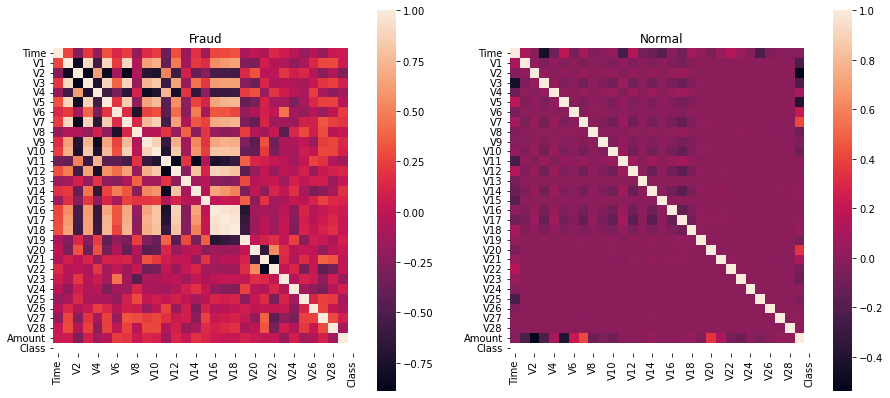

In [11]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,7))
sns.heatmap(FraudTransaction.corr(),ax=ax1,square=True)
ax1.set_title("Fraud")
sns.heatmap(NormalTransaction.corr(),ax=ax2,square=True)
ax2.set_title("Normal")
plt.show()

#### conclusion: the correlation between the features of those two types of data is obvious different

## 1.3 Sampling & Standardization

##### for the data is imbalanced,  oversampling is adopted

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

##### divide the training set and test set first,standardlize the Amount,and then perform SMOTE oversampling

In [13]:
x=data.drop('Class',axis=1)
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)
standardScaler=StandardScaler()
x_train['standAmount']=standardScaler.fit_transform(x_train["Amount"].values.reshape(-1,1))
x_test['standAmount']=standardScaler.fit_transform(x_test['Amount'].values.reshape(-1,1))
x_train=x_train.drop(["Time","Amount"],axis=1)
x_test=x_test.drop(["Time","Amount"],axis=1)

In [14]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,standAmount
105644,1.135011,-0.663898,0.703924,0.069871,-0.488154,1.312078,-0.897198,0.463148,-0.478801,0.396879,...,-0.677938,-0.331487,-0.069644,0.183987,-0.618678,0.089015,0.521419,0.086390,0.004782,-0.354552
139790,-1.786262,1.118886,1.347969,-0.379954,-1.240680,0.467667,0.081125,0.964933,0.042585,-1.275754,...,-0.099266,-0.047902,-0.182530,-0.162509,-0.405178,0.512595,0.299398,-0.042882,-0.059130,0.214653
158758,-0.683414,0.679341,2.615556,2.362138,-0.012716,0.603826,0.574245,-0.679978,-0.811409,2.035115,...,0.372610,-0.007167,0.463597,-0.243134,0.084557,-0.453177,2.687676,-1.084269,-0.511626,-0.212221
130845,1.183540,-0.493000,0.755202,-0.963160,-0.850295,0.145905,-0.794616,0.302199,1.656943,-0.939787,...,-0.168134,0.039588,0.339340,-0.053125,-0.298049,0.423994,-0.652284,0.102582,0.017292,-0.354552
88908,1.137583,0.105478,0.784402,1.254973,-0.600870,-0.360836,-0.161727,0.076092,0.280587,0.015787,...,-0.178887,-0.195692,-0.443664,0.046270,0.516246,0.447943,-0.554949,0.031821,0.018177,-0.327857


In [16]:
SM=SMOTE(random_state=1)
x_train_SM,y_train_SM=SM.fit_resample(x_train,y_train)

In [17]:
x_train_SM.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,standAmount
0,1.135011,-0.663898,0.703924,0.069871,-0.488154,1.312078,-0.897198,0.463148,-0.478801,0.396879,...,-0.677938,-0.331487,-0.069644,0.183987,-0.618678,0.089015,0.521419,0.086390,0.004782,-0.354552
1,-1.786262,1.118886,1.347969,-0.379954,-1.240680,0.467667,0.081125,0.964933,0.042585,-1.275754,...,-0.099266,-0.047902,-0.182530,-0.162509,-0.405178,0.512595,0.299398,-0.042882,-0.059130,0.214653
2,-0.683414,0.679341,2.615556,2.362138,-0.012716,0.603826,0.574245,-0.679978,-0.811409,2.035115,...,0.372610,-0.007167,0.463597,-0.243134,0.084557,-0.453177,2.687676,-1.084269,-0.511626,-0.212221
3,1.183540,-0.493000,0.755202,-0.963160,-0.850295,0.145905,-0.794616,0.302199,1.656943,-0.939787,...,-0.168134,0.039588,0.339340,-0.053125,-0.298049,0.423994,-0.652284,0.102582,0.017292,-0.354552
4,1.137583,0.105478,0.784402,1.254973,-0.600870,-0.360836,-0.161727,0.076092,0.280587,0.015787,...,-0.178887,-0.195692,-0.443664,0.046270,0.516246,0.447943,-0.554949,0.031821,0.018177,-0.327857


In [18]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# 2. modeling and evaluation

## 2.1 Evaluation indicators

### 2.1.1 confusion matrix

In [19]:
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 2.1.2 precision, recall , F1-score

In [20]:
def show_metrics():
    tp=cm[1,1]
    fn=cm[1,0]
    fp=cm[0,1]
    tn=cm[0,0]
    print("Precision = %.03f"%(tp/(tp+fp)*100)+"%")
    print("Recall = %.03f"%(tp/(tp+fn)*100)+"%" )
    print("F1-score = %.03f"% (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))*100)+"%")
    print("Accuracy= %.03f"% ((tp+tn)/(tp+tn+fp+fn)*100)+"%")

### 2.1.3 precision-recall curve

In [21]:
def plot_precision_recall():
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.plot(recall,precision,linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

### 2.1.4 ROC Cure

In [22]:
from sklearn.metrics import auc
def plot_roc():
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label='AUC=%0.3f'% roc_auc,linewidth=2)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--',linewidth=2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

### 2.1.5 Feature importance plot

In [23]:
predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'standAmount']
def plot_feature_importance(model):
    tmp=pd.DataFrame({'Feature':predictors,'Feature importance':model.feature_importances_})
    tmp=tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize=(15,8))
    plt.title('Feature importance',fontsize=15)
    s=sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

## 2.2 modeling and comparison

### 2.2.1 LogisticRegression

#### 1 modeling

In [24]:
lr=LogisticRegression()
lr.fit(x_train_SM,y_train_SM)
y_pred=lr.predict(x_test)
y_score=lr.decision_function(x_test)

#### 2 comparison

[[83153  2142]
 [   11   137]]


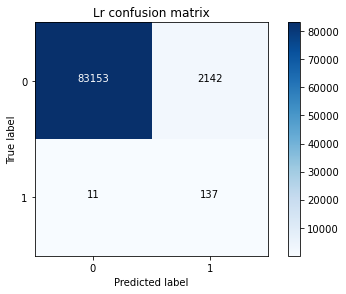

Precision = 6.011%
Recall = 92.568%
F1-score = 11.290%
Accuracy= 97.480%


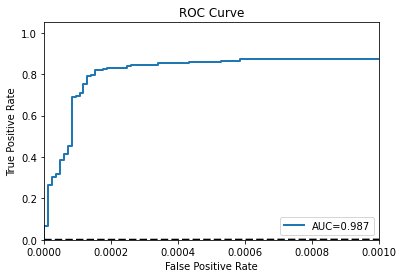

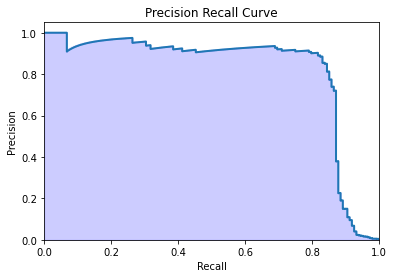

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cm,classes=class_names,title='Lr confusion matrix')
plt.show()


show_metrics()

fpr,tpr,t=roc_curve(y_test,y_score)
plot_roc()

precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [26]:
# show the parameters currently use
from pprint import pprint
print('Parameters Currently in use:\n')
pprint(lr.get_params())

Parameters Currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


#### 3 parameter optimizaiton

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'penalty':['l1','l2'],
    'class_weight':['balanced',None],
    'C':[0.1,1,10,100]
}
CV_lr=GridSearchCV(estimator=lr,param_grid=param_grid,scoring='recall',verbose=1,n_jobs=-1)
CV_lr.fit(x_train_SM,y_train_SM)
best_parameters=CV_lr.best_params_
print('the best parameters for using this model is: ',best_parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
the best parameters for using this model is:  {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}


#### 4 LR with the best parameters

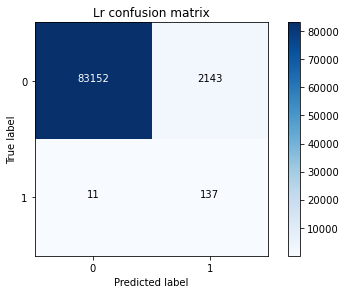

Precision = 6.009%
Recall = 92.568%
F1-score = 11.285%
Accuracy= 97.479%


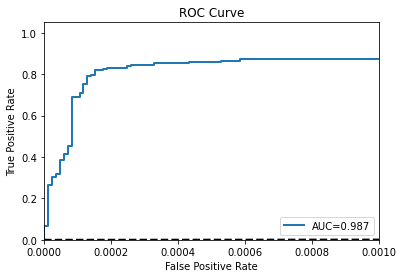

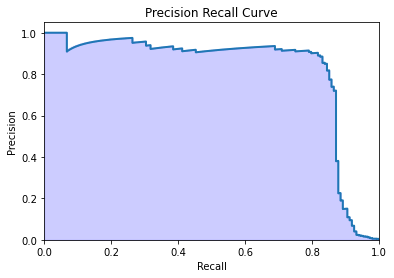

In [59]:
lr=LogisticRegression(C=best_parameters['C'],
                     penalty=best_parameters['penalty'],
                     class_weight=best_parameters['class_weight'])
lr.fit(x_train_SM,y_train_SM)
y_pred=lr.predict(x_test)
y_score=lr.decision_function(x_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Lr confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_lr, tpr_lr, t_lr = fpr, tpr, t
precision_lr, recall_lr, thresholds_lr = precision, recall, thresholds

## conclusion: after parameters optimization, it did not occur high progress in LR

### 2.2.2 XGBoost

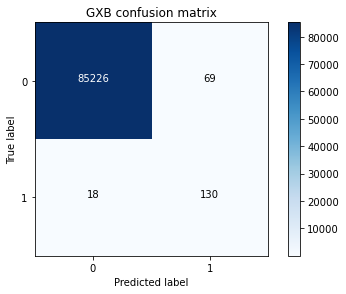

In [27]:
xgb_cf=xgb.XGBClassifier(n_jobs=-1)
xgb_cf.fit(x_train_SM,y_train_SM)
y_pred=xgb_cf.predict(x_test)
y_score=xgb_cf.predict_proba(x_test)[:,1]

cm=confusion_matrix(y_test,y_pred)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cm,
                     classes=class_names,
                     title="GXB confusion matrix")
plt.show()

In [28]:
show_metrics()

Precision = 65.327%
Recall = 87.838%
F1-score = 74.928%
Accuracy= 99.898%


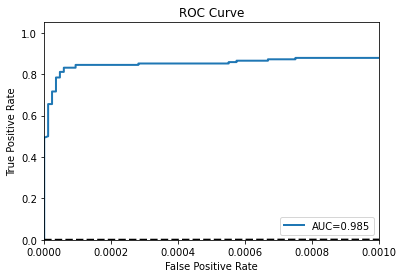

In [29]:
fpr,tpr,t=roc_curve(y_test,y_score)
plot_roc()

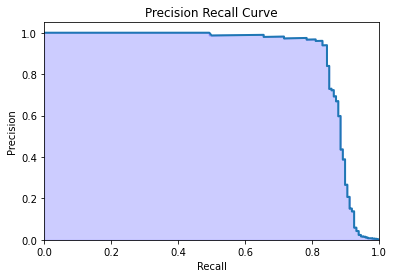

In [30]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

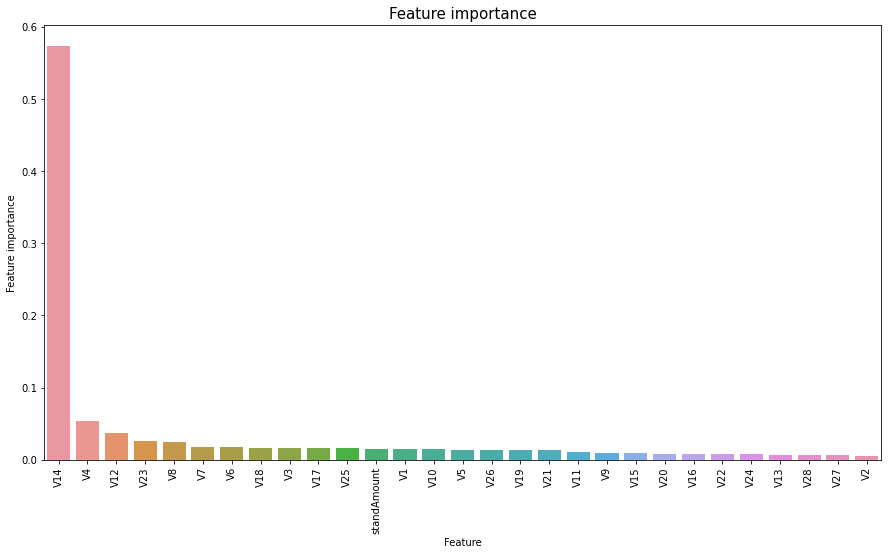

In [31]:
fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds
plot_feature_importance(xgb_cf)

In [32]:
print('Parameters Currently in use:\n')
pprint(xgb_cf.get_params())

Parameters Currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': None,
 'validate_parameters': None,
 'verbosity': None}


### 2.2.3 RandomForest

In [33]:
rf =RandomForestClassifier(n_jobs=-1,random_state=1)
rf.fit(x_train_SM,y_train_SM)
y_pred=rf.predict(x_test)

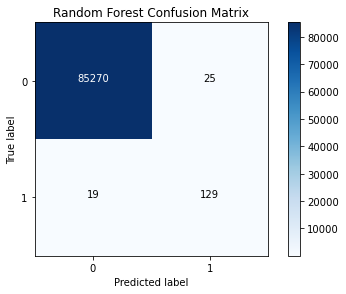

In [34]:
cm=confusion_matrix(y_test,y_pred)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cm,
                     classes=class_names,
                     title='Random Forest Confusion Matrix')
plt.show()

In [35]:
show_metrics()

Precision = 83.766%
Recall = 87.162%
F1-score = 85.430%
Accuracy= 99.949%


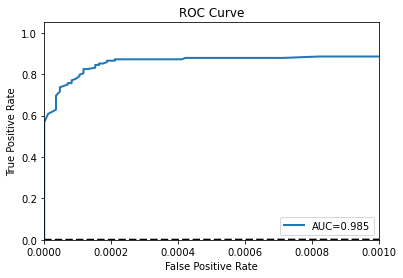

In [40]:
y_score=rf.predict_proba(x_test)[:,-1]
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

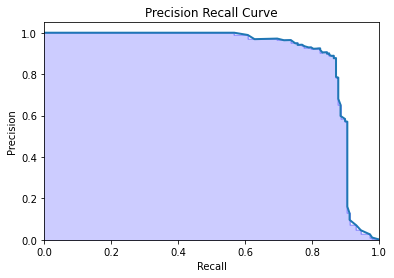

In [43]:
precision,recall,thresholds=precision_recall_curve(y_test,y_score)
plot_precision_recall()

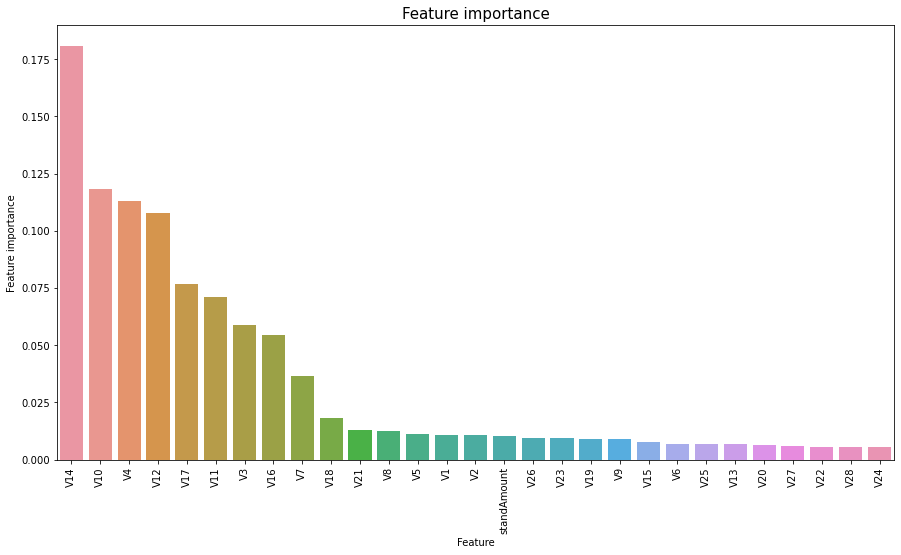

In [46]:
plot_feature_importance(rf)

In [45]:
fpr_rf, tpr_rf, t_rf = fpr, tpr, t
precision_rf, recall_rf, thresholds_rf = precision, recall, thresholds

In [47]:
# Show parameters currently use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


###  2.2.4 Voting Classifier

In [48]:
voting_cf=VotingClassifier(estimators=[('xgb',xgb_cf),('lr',lr),
                                      ('rf',rf)],
                            voting='soft',weights=[1,1,1.33])
voting_cf.fit(x_train_SM,y_train_SM)
y_pred=voting_cf.predict(x_test)
y_score=voting_cf.predict_proba(x_test)[:,-1]


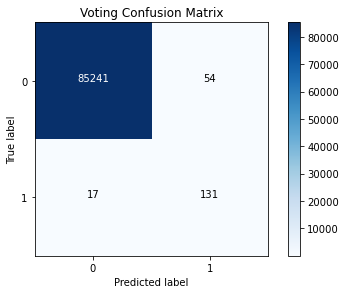

In [49]:
cm=confusion_matrix(y_test,y_pred)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cm,
                     classes=class_names,
                     title='Voting Confusion Matrix')
plt.show()

In [50]:
show_metrics()

Precision = 70.811%
Recall = 88.514%
F1-score = 78.679%
Accuracy= 99.917%


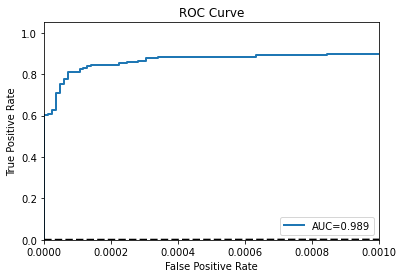

In [51]:
fpr,tpr,t=roc_curve(y_test,y_score)
plot_roc()

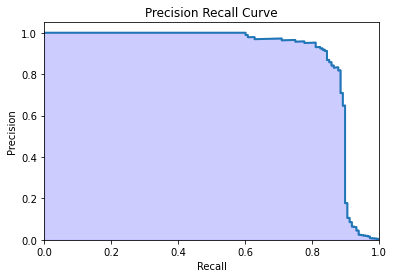

In [54]:
precision,recall,thresholds=precision_recall_curve(y_test,y_score)
plot_precision_recall()

In [55]:
fpr_voting, tpr_voting, t_voting = fpr, tpr, t
precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds

## 2.3 model celection

### 2.3.1 ROC Curve Comparence

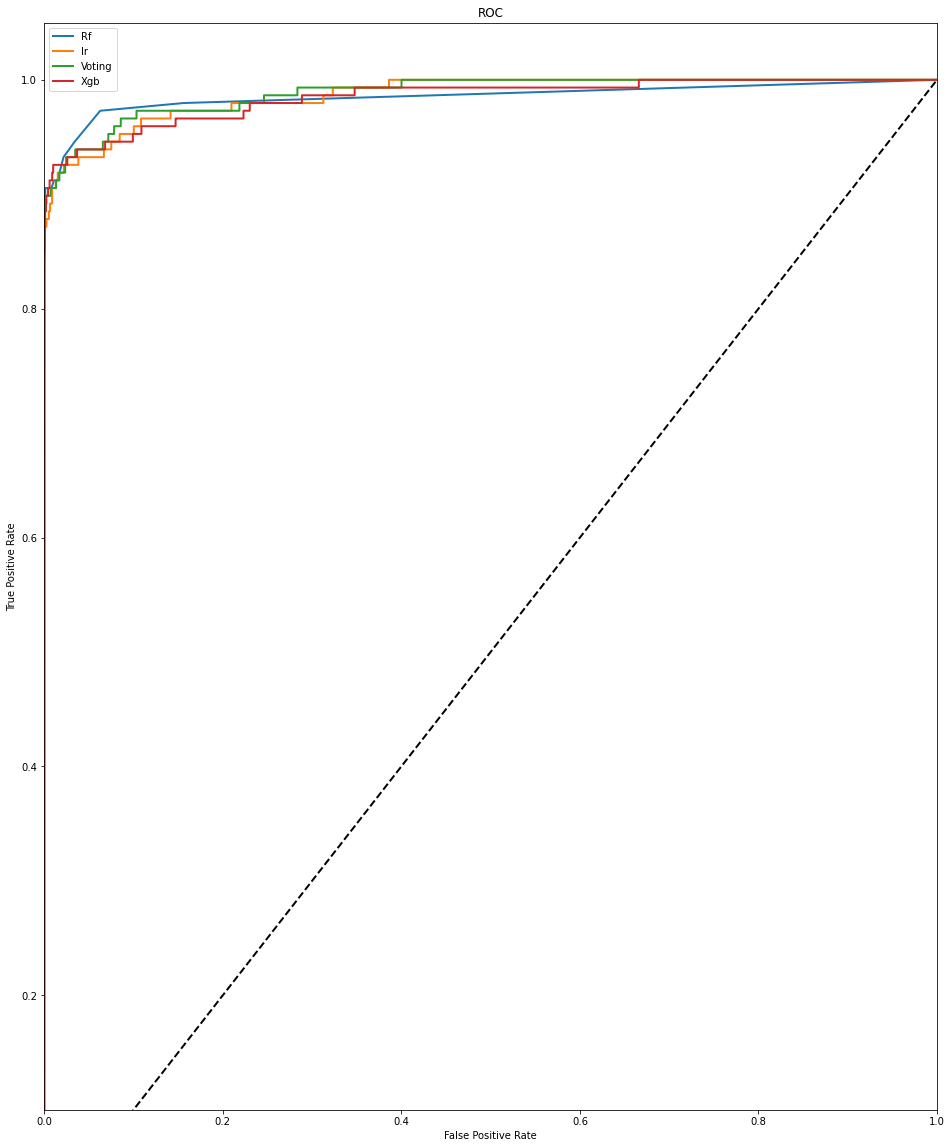

In [63]:
def roc_curve_all_models():
    plt.figure(figsize=(16,20))
    plt.plot(fpr_rf,tpr_rf,label='ROC curve',linewidth=2)
    plt.plot(fpr_lr,tpr_lr,label='ROC curve',linewidth=2)
    plt.plot(fpr_voting,tpr_voting,label='ROC curve',linewidth=2)
    plt.plot(fpr_xgb,tpr_xgb,label='ROC curve',linewidth=2)
    plt.plot([0,1],[0,1],'k--',linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.1,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(['Rf','lr','Voting','Xgb'],loc='upper left')
    plt.savefig('1.ROC.png')
    plt.show()
roc_curve_all_models()

### 2.3.2 Precision Recall curve comparence

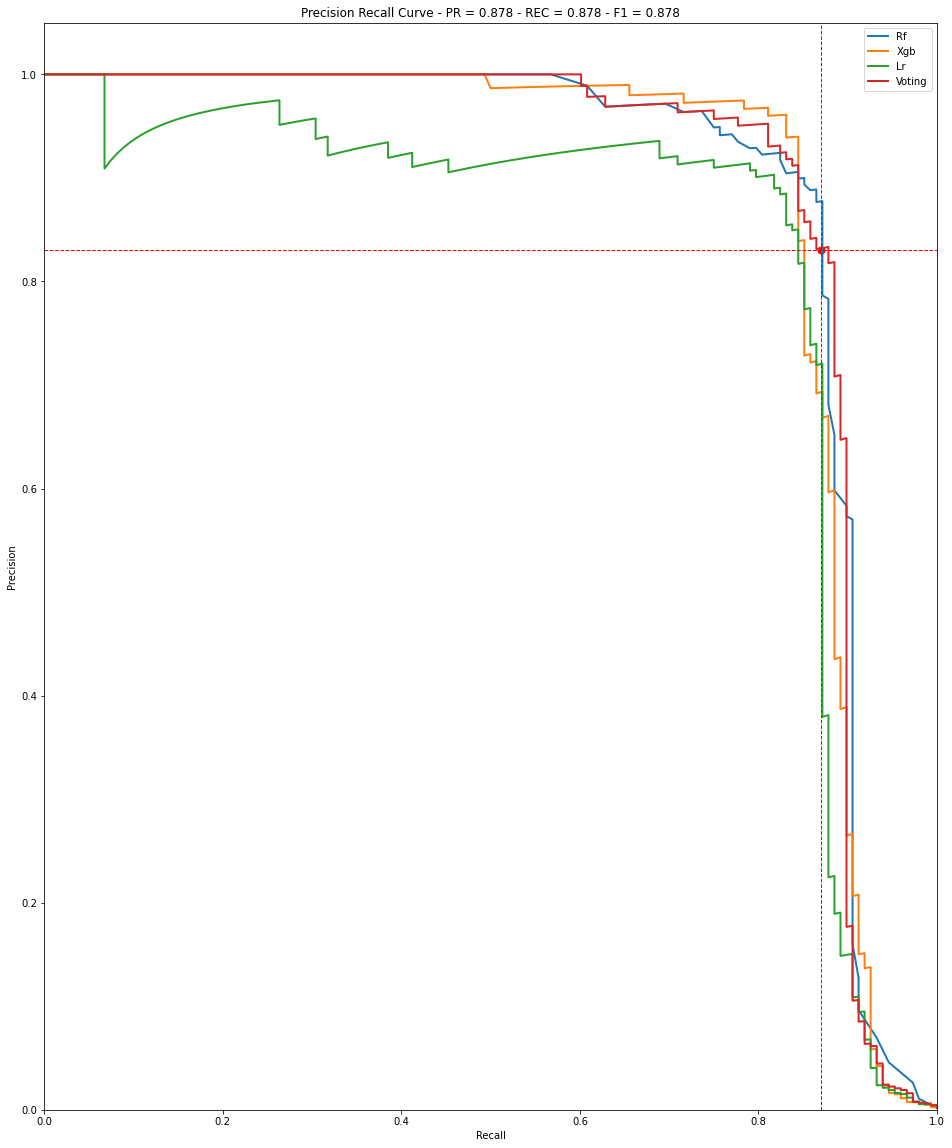

In [69]:
def prec_recall_all_models():
    plt.figure(figsize=(16,20))
    plt.plot(recall_rf,precision_rf,linewidth=2)
    plt.plot(recall_xgb,precision_xgb,linewidth=2)
    plt.plot(recall_lr,precision_lr,linewidth=2)
    plt.plot(recall_voting,precision_voting,linewidth=2)
    plt.scatter(rec,pr,linewidth=2,color='red')
    plt.axvline(rec,color='red',linewidth=1,linestyle='--')
    plt.axhline(pr,color='red',linewidth=1,linestyle='--')
    plt.xlim([0.0,1])
    plt.ylim(0.0,1.05)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve - PR = 0.878 - REC = 0.878 - F1 = 0.878')
    plt.legend(['Rf','Xgb','Lr','Voting'],loc='upper right')
    plt.savefig('2.prec_recc.png')
    plt.show()
rec = 0.87
pr = 0.83
prec_recall_all_models()

## conclusion: 
##     1.LogisticRegression takes the least time.Although parameter optimization has been carried out,the precision 6% and the F1-score 11.2% is terrible.in contrast,the Precision 65.327% and F1-score  74.928% of Xgb is much better than LR. but it is not the best for this case. consider the imbalance data and the main purpose of this project, the recall, precision and F1-score matter. Thus, the RandomForest is relatively better than others.Precision = 83.766% Recall = 87.162% F1-score = 85.430%. the Voting only gets recall a little better than it that is 88%. finnaly, the RF is better than other models in this case.

##     2. in actual use, the importance of precision and recall must be twice judged, for example, in this case, it is creditcard fraud. a high precision rate will lead to a low recall rate, which means more fraud; a high recall rate and low precision rate will mean more misjudgments. both will lead to poor user experience, but I personally think that the low recall rate should cause a greater problem. after all, after a misjudgment, the damage to the user experience can be reduced by appeasing the user or simplifying the confirmation process or someother ways. but after a fraud, a few ways can make up for the damage or the cost of make up for the damage is much higher.